## Cost Function

In this notebook I will compute the `cost` function for a linear regression model. This model has only one independent variable. 

The equation for cost with one variable is:
  $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2 \tag{1}$$ 
 
where 
  $$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{2}$$
  
- $f_{w,b}(x^{(i)})$ is our prediction for example $i$ using parameters $w,b$.  
- $(f_{w,b}(x^{(i)}) -y^{(i)})^2$ is the squared difference between the target value and the prediction.   
- These differences are summed over all the $m$ examples and divided by `2m` to produce the cost, $J(w,b)$.  

In [51]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

Here I generate the data points for x and y

Text(0.5, 1.0, 'house price vs. house square feet')

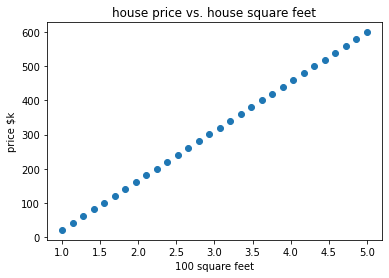

In [167]:
x = np.linspace(1, 5, 30)
y = np.linspace(20.5, 600, 30)

plt.scatter(x, y)
plt.xlabel('100 square feet')
plt.ylabel('price $k')
plt.title('house price vs. house square feet')

Below I want to calculate the cost function:

In [160]:
#Function to calculate the cost
def compute_cost(x, y, w, b):
   
    m = x.shape[0] 
    cost = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost += (f_wb - y[i])**2
        
    total_cost = 1 / (2 * m) * cost

    return total_cost

Let's calculate the `cost function` for single pairs of `w` and `b`. As an example below the cost value for `w = 10` and `b = 1` is calculated

In [161]:
cost_function(x, y, 10, 1)

51954.17169540229

Here we like to see the values of `w` and `b` which minimizes the cost thus we need to find the optimum values of w and b. Therefore we need to use an approach to minimize the cost. One famous approach is `Gradient Descent`. To calculate it we need to build a function to calculate the gradients of `w` and `b`.

### Gradient Descent
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$


In [162]:
def gradient_calc(x, y, w, b): 
  
    
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [163]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, compute_cost, gradient_calc): 
 
    # An array to store cost J and w's at each iteration primarily for graphing later
    costs = []
    w_b_s = []
    b = b_in
    w = w_in
    
    for iter in range(0, num_iters):
        # Calculate the gradient 
        dj_dw, dj_db = gradient_calc(x, y, w , b)     

        # Update w and b values
        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            
        
        if iter<100000:      
            costs.append( compute_cost(x, y, w , b))
            w_b_s.append([w,b])
        
        if iter%1000 == 0:
            print(f'iteration: {iter}, cost: {compute_cost(x, y, w , b)}, w: {w}, b: {b}')
 
    return w, b, costs, w_b_s 

In [164]:
w_initial = 0.5
b_initial = 0.001
iterations = 10000
alpha = 1e-2

w, b, cost, w_b_s = gradient_descent(x, y, w_initial, b_initial, alpha, iterations, cost_function, gradient_calc)

print(f'The final values for w: {w} and b: {b}')

iteration: 0, cost: 49527.00771840437, w: 11.820228620689655, b: 3.0884899999999997
iteration: 1000, cost: 128.67303380501352, w: 132.24317758114304, b: -81.00933804118318
iteration: 2000, cost: 10.307367796304725, w: 141.29983468856736, b: -112.10128325497749
iteration: 3000, cost: 0.825672852707409, w: 143.8631264491978, b: -120.90118878779917
iteration: 4000, cost: 0.06614061641831563, w: 144.5886109819765, b: -123.39181254434155
iteration: 5000, cost: 0.005298201492094052, w: 144.79394375578897, b: -124.09672996345657
iteration: 6000, cost: 0.00042441302441613676, w: 144.85205877560898, b: -124.29624165865597
iteration: 7000, cost: 3.3997652894598194e-05, w: 144.86850698047164, b: -124.35270914753058
iteration: 8000, cost: 2.72338579603338e-06, w: 144.87316229064862, b: -124.36869105423834
iteration: 9000, cost: 2.1815712442813824e-07, w: 144.87447987594294, b: -124.37321438876445
The final values for w: 144.87485260415963 and b: -124.37449398289682


### plot the fitted line
The final values for `w` and `b` are calculated and let's plot the fitted line with these values.

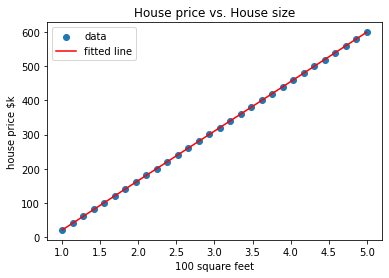

In [166]:
f = w*x+b
plt.scatter(x, y)
plt.plot(x, f, '-r')
plt.xlabel('100 square feet')
plt.ylabel('house price $k')
plt.title('House price vs. House size')
plt.legend(['data', 'fitted line'])

### summary
In this notebook I covered the concept of `gradient descent` and brought an example how to calculate the `cost function` and obtain the best value of fit.